#hello world with 2 qubit bell state 

step 1, mapping problem to circuits and operators

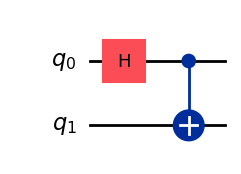

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0) # Apply Hadamard gate to qubit 0
qc.cx(0, 1) # Apply CNOT gate with control qubit 0 and target qubit 1

qc.draw(output='mpl') # Draw the circuit using matplotlib

In [ ]:
from qiskit.quantum_info import Pauli
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
II = Pauli('II')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
#choosing identity or X or Z for each qubit
#ZZ for ex is Z on qubit 0 and Z on qubit 1
observables = [ZZ, ZI, IZ, II, XX, XI, IX]

Step 2 - optimize the circuit (not needed for this ex)

step 3 - execute on backend

In [3]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()
job = estimator.run([qc]*len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        ,  0.015625  ,  0.015625  ,  1.        ,  1.        ,
       -0.04296875, -0.04296875]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 11, 'parallel_shots': 1, 'sample_measure_time': 0.000272, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001319833, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 18432, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.999755859375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 11, 'parallel_shots': 1, 'sample_measure_time': 0.000272, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubit

Step 4 - post processing and plotting

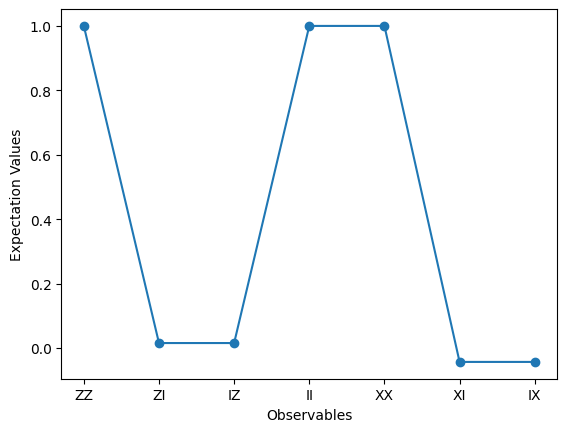

In [4]:
import matplotlib.pyplot as plt #bc matching bits the correlation is perfect, hense the +1
data = ['ZZ', 'ZI', 'IZ', 'II', 'XX', 'XI', 'IX']
values = job.result().values
plt.plot(data, values, 'o-')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.show()

Hello world for n qubit state

#step 1, map problem to circuits and operators

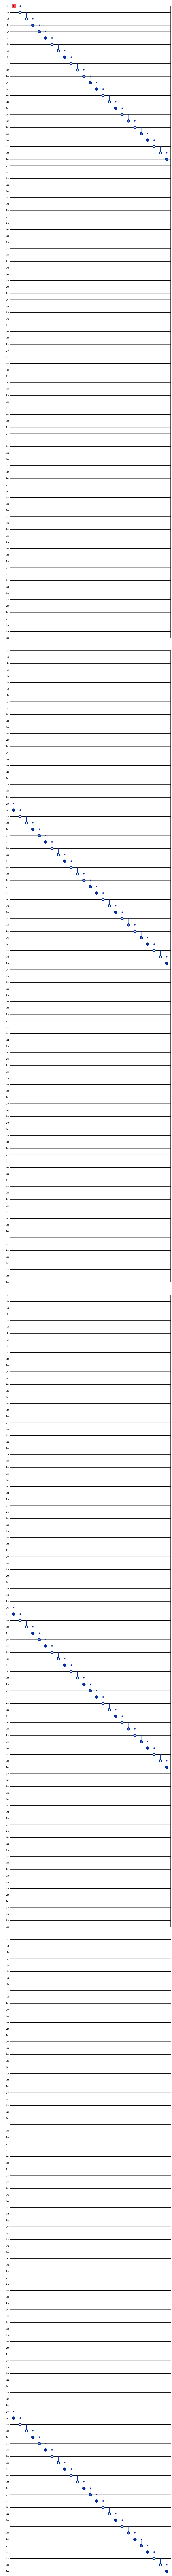

In [5]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)  # Apply Hadamard gate to the first qubit
    for i in range(n-1):
        qc.cx(i,i+1)  # Apply CNOT gates from the first qubit to all other qubits
    return qc
n = 100  # Number of qubits
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')  # Draw the circuit using matplotlib

#bc q0 has hadamard, q1 will have the closest correlation, hense the +1

In [6]:
from qiskit.quantum_info import SparsePauliOp
operator_strings = ['Z'+'I'*i+'Z'+'I'*(n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

step 2 - optimize for quantum execution

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
backend_name = "ibm_fez"
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=2,backend=backend)

qc.transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc.transpiled._layout) for op in operators]


qiskit_runtime_service.__init__:WARNING:2025-11-24 10:20:15,628: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-24 10:20:15,628: Using instance: open-instance, plan: open


#step3, execute the backend

In [26]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions
options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
job = estimator.run([(qc.transpiled,operators_transpiled_list)])
job_id = job.job_id()
print(f"Job ID: {job_id}")

Job ID: d4i8bg92bisc73a56st0


In [ ]:
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
 
# data
data = list(range(1, len(operators) + 1))  # Distance between the Z operators
result = job.result()[0]
values = result.data.evs  # Expectation value at each Z operator.
values = [
    v / values[0] for v in values
]  # Normalize the expectation values to evaluate how they decay with distance.
 
# plotting graph
plt.plot(data, values, marker="o", label="100-qubit GHZ state")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\xlangle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
Explaination: 